In [2]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score,  roc_curve, confusion_matrix, classification_report
%matplotlib inline

In [3]:
df = pd.read_csv("Course Project/Tel_Customer_Churn_Dataset.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3137,4567-AKPIA,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,No
2364,4559-UWIHT,Male,0,Yes,No,14,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185,No
827,9146-JRIOX,Female,0,Yes,Yes,14,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.55,372.45,No
1718,7279-NMVJC,Female,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.90,323.15,No
1205,6358-LYNGM,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,74.9,Yes


In [4]:
df.drop('customerID', axis='columns', inplace=True)


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.shape

(7043, 20)

In [9]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\dilli\AppData\Local\Temp\ipykernel_11608\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df1[df1.Churn != 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


# DATA VISUALIZATION

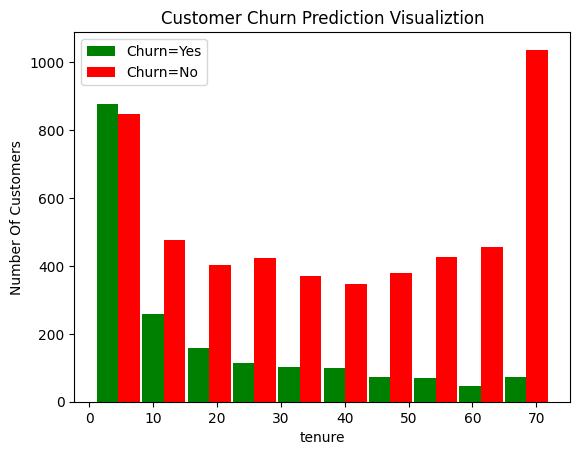

In [14]:
tenureChurnNo = df1[df1.Churn == 'No'].tenure
tenureChurnYes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenureChurnYes, tenureChurnNo], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

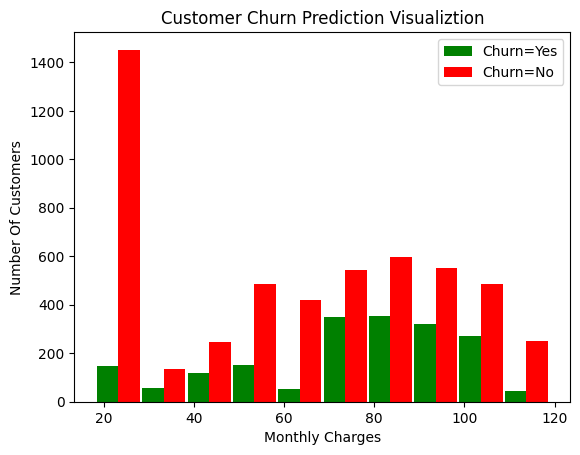

In [15]:
MonthlyChargesChurnNo = df1[df1.Churn == 'No'].MonthlyCharges
MonthlyChargesChurnYes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([MonthlyChargesChurnYes, MonthlyChargesChurnNo], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
# Finding object columns and its categories
def objectCategories(df):
    for column in df:
        if(df[column].dtype=='object'):
            print(f'{column}: {df[column].unique()}')

In [17]:
objectCategories(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

C:\Users\dilli\AppData\Local\Temp\ipykernel_11608\3221983738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
C:\Users\dilli\AppData\Local\Temp\ipykernel_11608\3221983738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [19]:
objectCategories(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
# Converting yes and no to 1 and 0
yesNoColumns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yesNoColumns:
    df1[col].replace({'Yes': 1,'No' : 0}, inplace=True)

C:\Users\dilli\AppData\Local\Temp\ipykernel_11608\929716766.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No' : 0}, inplace=True)
C:\Users\dilli\AppData\Local\Temp\ipykernel_11608\929716766.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':

In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\dilli\AppData\Local\Temp\ipykernel_11608\698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\dilli\AppData\Local\Temp\ipykernel_11608\698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].repl

In [23]:
df1.gender.unique()

array([1, 0], dtype=int64)

### One hot encoding for categorical columns

In [24]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
print(df2.dtypes)

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [25]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3002,0,0,0,0,27,1,0,1,0,1,...,True,False,False,False,True,False,False,False,True,False
3391,0,0,0,0,4,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
2309,0,0,0,0,57,1,1,0,0,0,...,False,True,False,False,False,True,False,True,False,False
6579,0,0,0,0,72,1,1,1,0,1,...,True,False,False,False,False,True,False,True,False,False
2681,0,0,1,0,46,0,0,1,0,1,...,True,False,False,False,False,True,False,True,False,False


In [26]:
# List of columns to convert to uint
columns_to_convert = ['InternetService_DSL', 'InternetService_Fiber optic','InternetService_No',  
                      'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
                      'PaymentMethod_Bank transfer (automatic)',
                      'PaymentMethod_Credit card (automatic)',
                      'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Converting selected boolean columns to uint
df2[columns_to_convert] = df2[columns_to_convert].astype('uint8')

In [27]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [28]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [29]:
colstoScale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[colstoScale] = scaler.fit_transform(df2[colstoScale])

In [30]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Test Train Split

In [31]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 2)

In [32]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size= 0.2, random_state= 8)

In [33]:
print(X_train.shape)
print(X_test.shape)

(4922, 26)
(2110, 26)


In [34]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6532,1,1,0,0,0.239437,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4834,0,0,1,1,0.929577,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3858,0,0,0,0,0.647887,1,0,1,1,1,...,1,0,0,0,1,0,1,0,0,0
6431,0,0,0,0,0.225352,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
454,1,0,1,0,0.845070,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3245,1,0,1,1,0.309859,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2859,0,1,1,0,0.971831,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
6346,0,1,1,1,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
646,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4371,0,0,1,1,0.169014,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0


# ANN Model

In [35]:
# import tensorflow as tf
# from tensorflow import keras


# model = keras.Sequential([
#     keras.layers.Dense(26, input_shape=(26,), activation='relu'),
#     keras.layers.Dense(15, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# # opt = keras.optimizers.Adam(learning_rate=0.01)

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=5)

# ANN Model 2

In [36]:
# import tensorflow as tf
# from tensorflow import keras


# model2 = keras.Sequential([
#     keras.layers.Dense(26, input_shape=(26,), activation='relu'),
#     keras.layers.Dense(15, activation='relu'),
#     keras.layers.Dense(10, activation='relu'),
#     keras.layers.Dense(20, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# opt = keras.optimizers.Adam(learning_rate=0.1)

# model2.compile(optimizer='sgd',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history2 = model2.fit(X_train, y_train, batch_size=32, epochs=10)

# # Plot the accuracy curve
# plt.plot(history2.history['accuracy'], label='Training Accuracy- Lr=0.1, Sigmoid, Batch=32 ')
# #plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Curve for Epochs')
# plt.legend()
# plt.show()

Epoch 1/100


c:\Users\dilli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7575 - loss: 0.5188
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7948 - loss: 0.4210
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7960 - loss: 0.4156
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8087 - loss: 0.4059
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8113 - loss: 0.4015
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8129 - loss: 0.4028
Epoch 7/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8041 - loss: 0.3994
Epoch 8/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8142 - loss: 0.4012
Epoch 9/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8132 - loss: 0.4037
Epoch 10/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8162 - loss: 0.4051
Epoch 11/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8165 - loss: 0.3875
Epoch 12/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

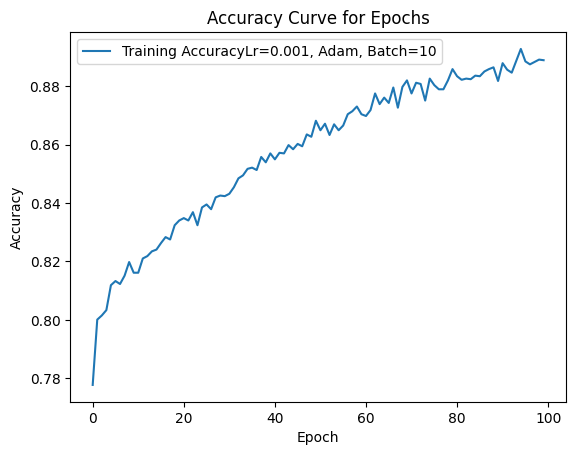

NameError: name 'lr' is not defined

In [37]:
import tensorflow as tf
from tensorflow import keras



model2 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model2.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, batch_size=10, epochs=100)

y_pred = model2.predict(X_test)



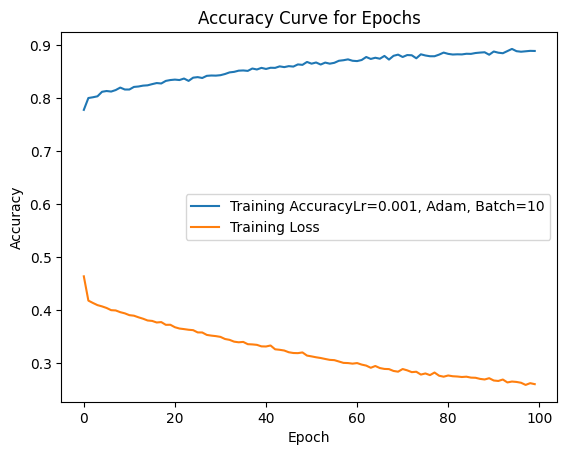

ValueError: Classification metrics can't handle a mix of binary and continuous targets

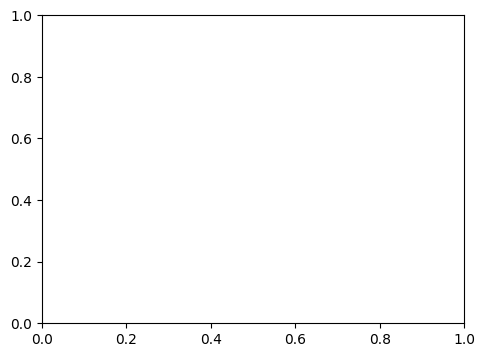

In [40]:
# Predict probabilities for the positive class
y_pred_prob = model2.predict(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
y_pred_class = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

# ANN model 3

Epoch 1/100


c:\Users\dilli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3233 - loss: 0.7157
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6766 - loss: 0.6750
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7305 - loss: 0.6289
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5820
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7320 - loss: 0.5545
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7245 - loss: 0.5384
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7245 - loss: 0.5208
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.4939
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7406 - loss: 0.4797
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7714 - loss: 0.4734
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7801 - loss: 0.4583
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - lo

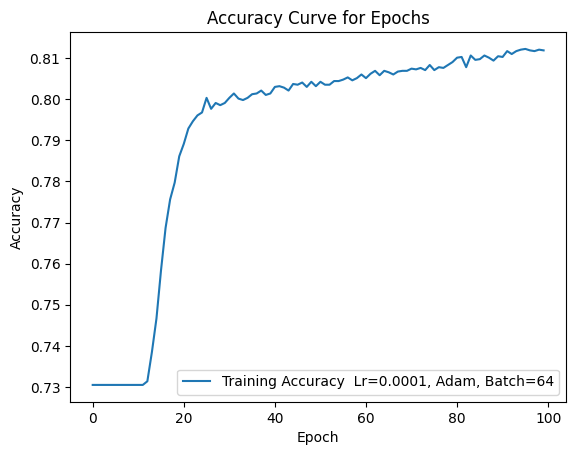

In [ ]:
import tensorflow as tf
from tensorflow import keras


model3 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
lr=0.0001
batch_size=64
opt = keras.optimizers.Adam(learning_rate=lr)

model3.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(X_train1, y_train1, batch_size=batch_size, epochs=100)

# Plot the accuracy curve
plt.plot(history3.history['accuracy'], label=f'Training Accuracy  Lr={lr}, Adam, Batch={batch_size}')
#plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Epochs')
plt.legend()
plt.show()
y_pred = model3.predict(X_test)

# Plot the accuracy curve
plt.plot(history3.history['accuracy'], label='Training AccuracyLr=0.001, Adam, Batch=10')
#plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Epochs')
plt.legend()
plt.show()

plt.plot(history3.history['loss'], label=f'Training Loss  Lr={lr}, Sigmoid, Batch={batch_size}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for Epochs')
plt.legend()
plt.show()

# Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("ANN model 1 Confusion Matrix - Linear")
print(classification_report(y_test,y_pred))
# ROC Curve
y_pred_prob = model3.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVM Linear', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Linear ROC Curve')
plt.show()

# ANN model 4

Epoch 1/100


c:\Users\dilli\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7685 - loss: 0.4834
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7872 - loss: 0.4294
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8019 - loss: 0.4372
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7984 - loss: 0.4272
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7871 - loss: 0.4365
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8047 - loss: 0.4155
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8110 - loss: 0.4140
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8128 - loss: 0.4067
Epoch 9/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7986 - loss: 0.4287
Epoch 10/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7969 - loss: 0.4254
Epoch 11/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8097 - loss: 0.4089
Epoch 12/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

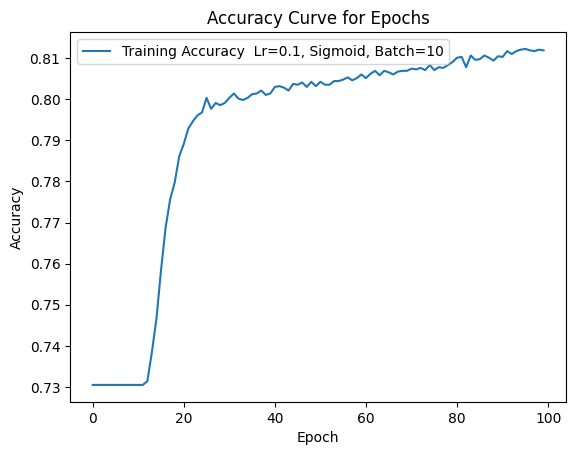

In [ ]:
# import tensorflow as tf
# from tensorflow import keras


# model4 = keras.Sequential([
#     keras.layers.Dense(26, input_shape=(26,), activation='relu'),
#     keras.layers.Dense(15, activation='relu'),
#     keras.layers.Dense(10, activation='relu'),
#     #keras.layers.Dense(25, activation='relu'),
#     keras.layers.Dense(20, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
# lr=0.1
# batch_size=10
# opt = keras.optimizers.SGD(learning_rate=lr)

# model4.compile(optimizer=opt,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history4 = model4.fit(X_train1, y_train1, batch_size=batch_size, epochs=100)

# # Plot the accuracy curve
# plt.plot(history2.history['accuracy'], label=f'Training Accuracy  Lr={lr}, Sigmoid, Batch={batch_size}')
# #plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Curve for Epochs')
# plt.legend()
# plt.show()

# plt.plot(history2.history['loss'], label=f'Training Loss  Lr={lr}, Sigmoid, Batch={batch_size}')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Loss Curve for Epochs')
# plt.legend()
# plt.show()

In [ ]:
# print(model.evaluate(X_test, y_test))
# print(model2.evaluate(X_test, y_test))
# print(model3.evaluate(X_test1, y_test1))
# print(model4.evaluate(X_test1, y_test1))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7871 - loss: 0.4398
[0.44035497307777405, 0.7815166115760803]
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8104 - loss: 0.4218
[0.42319443821907043, 0.8061611652374268]
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7891 - loss: 0.4097
[0.4103673994541168, 0.796730637550354]
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7768 - loss: 0.4848
[0.5206469893455505, 0.7803837656974792]


In [ ]:
# yp = model.predict(X_test)
# yp2 = model2.predict(X_test)
# yp3 = model3.predict(X_test)
# yp4 = model4.predict(X_test)
# yp[:5]
# yp2[:5]
# yp3[:5]
# yp4[:5]

 1/66 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[5.5500376e-01],
       [6.8635226e-04],
       [3.8152448e-05],
       [3.4360450e-02],
       [5.3963725e-02]], dtype=float32)

In [ ]:
# y_pred = []
# for element in yp:
#     if element > 0.5:
#         y_pred.append(1)
#     else:
#         y_pred.append(0)

In [ ]:
# y_pred2 = []
# for element in yp2:
#     if element > 0.5:
#         y_pred2.append(1)
#     else:
#         y_pred2.append(0)

In [ ]:
y_pred2[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
# y_test[:10]

3536    0
5804    0
3295    0
3541    0
490     0
4804    0
1604    0
6516    1
3681    1
2826    0
Name: Churn, dtype: int64

In [ ]:
# from sklearn.metrics import confusion_matrix , classification_report

# print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1540
           1       0.66      0.58      0.62       570

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



Text(95.72222222222221, 0.5, 'Truth')

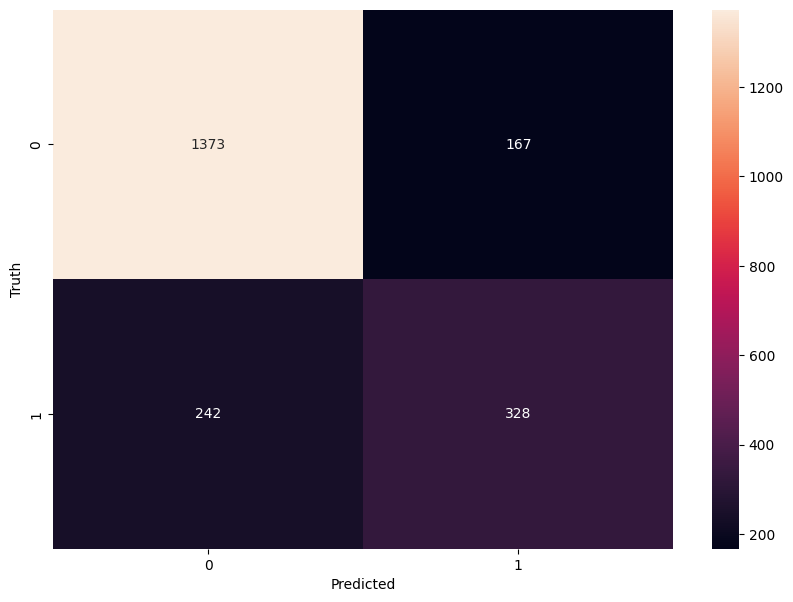

In [ ]:
# import seaborn as sn
# cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred2)

# plt.figure(figsize = (10,7))
# sn.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

### Accuracy

In [ ]:
# round((1373+328)/(1373+328+167+242),2)

0.81